In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../dataset/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
x =data[['Annual Income (k)', 'Spending Score (1-100)']]
#x =data.iloc[:,3:]

In [7]:
x.sample(5)

,Annual Income (k),Spending Score (1-100)
173,87,92
122,69,58
40,38,35
51,42,60
134,73,5


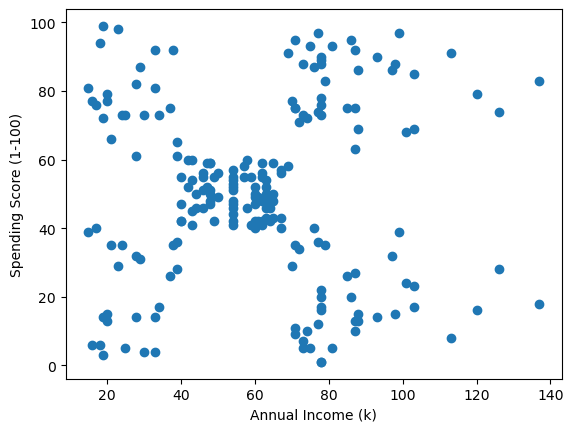

In [8]:
plt.scatter(x['Annual Income (k)'],x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [10]:
sse = []#sum of square errors

for clusters in range(1,10):
    k = KMeans(n_clusters=clusters)
    k.fit(x)
    sse.append(k.inertia_)

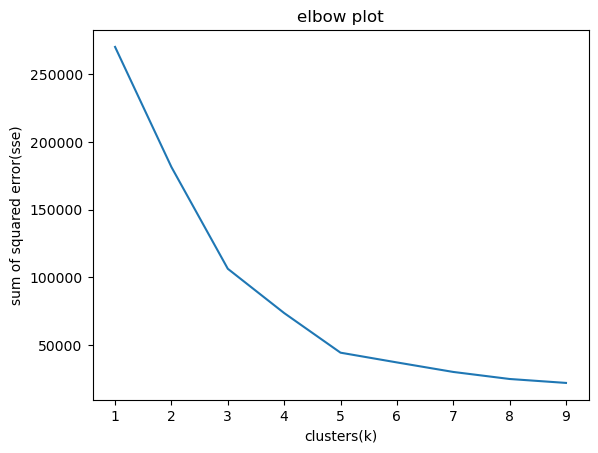

In [11]:
plt.plot(range(1,10),sse)
plt.xlabel('clusters(k)')
plt.ylabel('sum of squared error(sse)')
plt.title('elbow plot')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=5, random_state=666)

In [13]:
kmeans.fit(x)

KMeans(n_clusters=5, random_state=666)

In [14]:
x.head()

,Annual Income (k),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
cluster_labels= kmeans.labels_
cluster_labels[:5]

array([0, 2, 0, 2, 0])

In [16]:
x= x.values

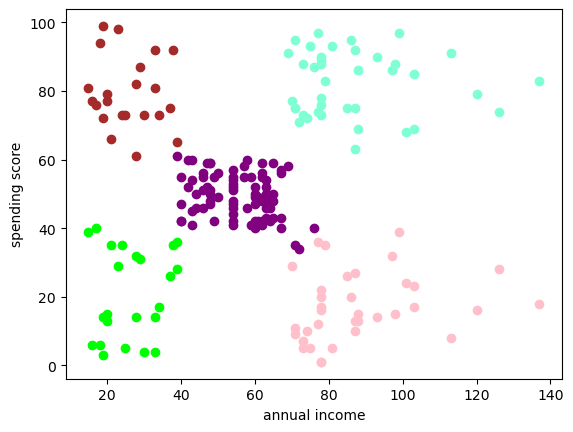

In [17]:
plt.scatter(x[cluster_labels==0,0],x[cluster_labels==0,1],c='#00FF00')
plt.scatter(x[cluster_labels==1,0],x[cluster_labels==1,1],c='#7FFFD4')
plt.scatter(x[cluster_labels==2,0],x[cluster_labels==2,1],c='#A52A2A')
plt.scatter(x[cluster_labels==3,0],x[cluster_labels==3,1],c='#800080')
plt.scatter(x[cluster_labels==4,0],x[cluster_labels==4,1],c='#FFC0CB')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

In [18]:
pred_data=[[100,5],[40,10],[50,25],[0,100]]

In [19]:
kmeans.predict(pred_data)

array([4, 0, 0, 2])

In [20]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(x)
cluster_labels=agglo.labels_

In [21]:
x[:15]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13]], dtype=int64)

In [22]:
cluster_labels[:15]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4], dtype=int64)

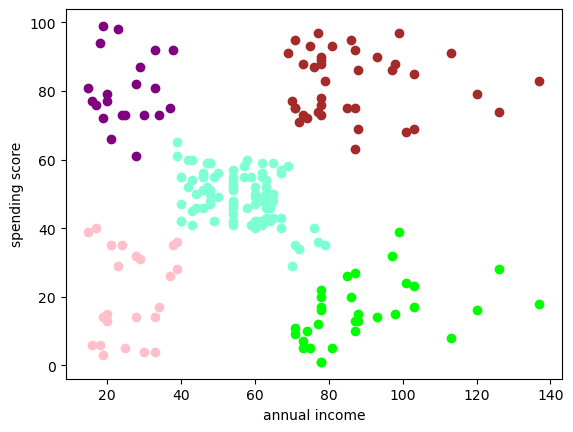

In [23]:
plt.scatter(x[cluster_labels==0,0],x[cluster_labels==0,1],c='#00FF00')
plt.scatter(x[cluster_labels==1,0],x[cluster_labels==1,1],c='#7FFFD4')
plt.scatter(x[cluster_labels==2,0],x[cluster_labels==2,1],c='#A52A2A')
plt.scatter(x[cluster_labels==3,0],x[cluster_labels==3,1],c='#800080')
plt.scatter(x[cluster_labels==4,0],x[cluster_labels==4,1],c='#FFC0CB')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

In [24]:
image= plt.imread('../dataset/image.jpg')

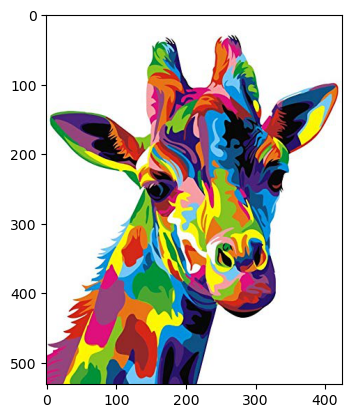

In [25]:
plt.imshow(image)
plt.show()

In [26]:
image.shape

(531, 425, 3)

In [27]:
image = image/255

In [28]:
h, w, dim =image.shape

In [29]:
image=image.reshape(h*w,dim)
image.shape

(225675, 3)

In [30]:
compressor= KMeans(n_clusters=2)
compressor.fit(image)

KMeans(n_clusters=2)

In [31]:
compressor.labels_


array([1, 1, 1, ..., 1, 1, 1])

In [32]:
compressor.cluster_centers_

array([[0.44636066, 0.36874903, 0.29564947],
       [0.97650892, 0.97944941, 0.97161172]])

In [33]:
new_image = compressor.cluster_centers_[compressor.labels_]

In [34]:
new_image=new_image.reshape(h,w,dim)

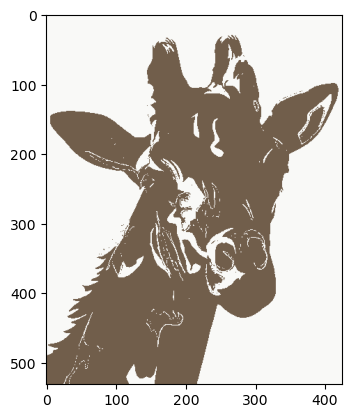

In [35]:
plt.imshow(new_image)
plt.show()